In [1]:
#scaling constants
B_b   = 1e1
b_B   = 1/B_b
G_1   = 1e9
one_G = 1/G_1
G_K   = 1e6
K_G   = 1/G_K
G_M   = 1e3
M_G   = 1/G_M
K_1   = 1e3
one_K = 1/K_1
M_1   = 1e6
one_M = 1/M_1
m_1   = 1e-3
one_m = 1/m_1
m_u   = 1e3 
u_m   = 1/m_u
u_1   = 1e-6
one_u = 1/u_1
n_1   = 1e-9
one_n = 1/n_1
n_m   = 1e-6
m_n   = 1/n_m

sz1K  = 1024
sz1M  = sz1K*sz1K
sz1G  = sz1M*sz1K


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
import re
from datetime import datetime

sns.set(style="darkgrid")

# Compute statistical moments: mean, std, skewness, kurtosis
def compute_moments(series):
    values = series.dropna()
    return {
        'count': len(values),
        'mean': values.mean(),
        'std': values.std(),
        'skew': skew(values),
        'kurtosis': kurtosis(values)
    }

# Load the log file into a list of lines
def load_log_file(path):
    with open(path, 'r') as f:
        lines = f.readlines()
    return [line.strip() for line in lines if line.strip()]


In [3]:
# Replace this with the actual path to your log file
log_path = "sim_log.txt"

# Load and inspect
lines = load_log_file(log_path)
print(f"Loaded {len(lines)} lines from the log.")


Loaded 2296 lines from the log.


📊 Sender Estimated Frame Rate Statistics:
count: 100.000
mean: 33.760
std: 0.698
skew: 6.575
kurtosis: 48.714


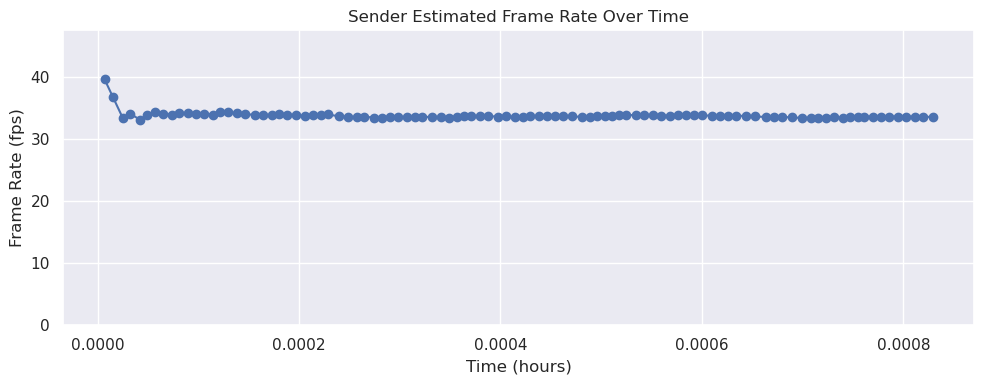

In [4]:
# Extract lines with frame rate information
#frame_rate_lines = [line for line in lines if "Sender estimated frame rate is" in line]
frame_rate_lines = [line for line in lines if "[simulate_stream:] Estimated frame rate (Hz): " in line]

# Parse frame rate values from lines
frame_rates = []
timestamps = []
for line in frame_rate_lines:
    match = re.search(r"\[simulate_stream:\] Estimated frame rate \(Hz\): ([\d.]+)", line)
    if match:
        value = float(match.group(1))
        frame_rates.append(value)
        # Optional: extract timestamp if available at the beginning of the line
        ts_match = re.match(r"([\d.]+)", line)
        timestamps.append(ts_match.group(1) if ts_match else None)
    else:
        print("No match")

# Create a DataFrame
frame_rate_df = pd.DataFrame({
#    'timestamp': pd.to_datetime(timestamps, errors='coerce'),
    'timestamp': timestamps,
    'frame_rate': frame_rates
})

# Display statistics
frame_rate_stats = compute_moments(frame_rate_df['frame_rate'])

# Convert microseconds to hours
frame_rate_df['hours'] = frame_rate_df['timestamp'].astype(float) / 3_600_000_000  # 1 hour = 3.6e9 µs

print("📊 Sender Estimated Frame Rate Statistics:")
for k, v in frame_rate_stats.items():
    print(f"{k}: {v:.3f}")
# Plot
plt.figure(figsize=(10, 4))
plt.plot(frame_rate_df['hours'], frame_rate_df['frame_rate'], marker='o', linestyle='-')

plt.title('Sender Estimated Frame Rate Over Time')
plt.xlabel('Time (hours)')
plt.ylabel('Frame Rate (fps)')
plt.ylim(0, max(frame_rate_df['frame_rate']) * 1.2)  # Give headroom
plt.grid(True)

plt.tight_layout()
plt.show()


📊 Sender Bit Rate Statistics (Mbps):
count: 100.000
mean: 20.256
std: 0.419
skew: 6.575
kurtosis: 48.714


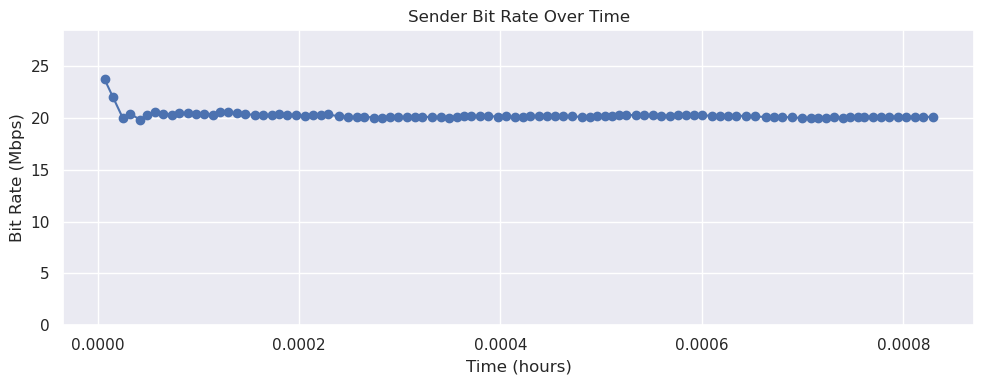

In [5]:
# Extract lines with bit rate information
bit_rate_lines = [line for line in lines if "[simulate_stream:] Estimated bit rate (MHz):" in line]

# Parse bit rate values and timestamps
bit_rates = []
timestamps = []
for line in bit_rate_lines:
    match = re.search(r"\[simulate_stream:\] Estimated bit rate \(MHz\): ([\d.]+)", line)
    if match:
        value = float(match.group(1))
        bit_rates.append(value)
        ts_match = re.match(r"([\d.]+)", line)
        timestamps.append(ts_match.group(1) if ts_match else None)
    else:
        print("No match in bit rate line:", line)

# Create a DataFrame
bit_rate_df = pd.DataFrame({
    'timestamp': timestamps,
    'bit_rate': bit_rates
})

# Convert microseconds to hours
bit_rate_df['hours'] = bit_rate_df['timestamp'].astype(float) / 3_600_000_000

# Compute statistics
bit_rate_stats = compute_moments(bit_rate_df['bit_rate'])

# Display statistics
print("📊 Sender Bit Rate Statistics (Mbps):")

for k, v in bit_rate_stats.items():
    print(f"{k}: {v:.3f}")

# Plot
plt.figure(figsize=(10, 4))
plt.plot(bit_rate_df['hours'], bit_rate_df['bit_rate'], marker='o', linestyle='-')
plt.title('Sender Bit Rate Over Time')
plt.xlabel('Time (hours)')
plt.ylabel('Bit Rate (Mbps)')
plt.ylim(0, max(bit_rate_df['bit_rate']) * 1.2)
plt.grid(True)
plt.tight_layout()
plt.show()


📊 Sender Frame Size Statistics (kB):
count: 100.000
mean: 59.687
std: 6.153
skew: 0.349
kurtosis: -0.256


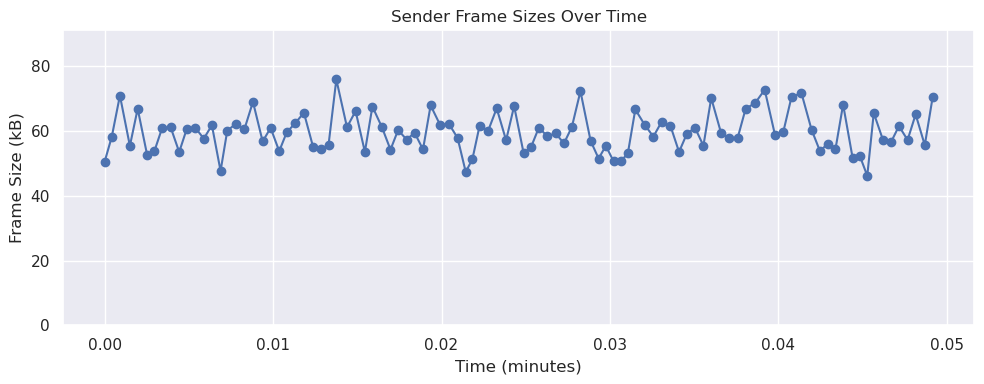

In [6]:
# Extract lines with bit rate information
sent_frame_lines = [line for line in lines if "[simulate_stream:] Sending frame" in line]

# Parse bit rate values and timestamps
frame_sizes = []
timestamps = []
for line in sent_frame_lines:
    match = re.search(r"\[simulate_stream:\] Sending frame; size = ([\d.]+)", line)
    if match:
        value = float(match.group(1))
        frame_sizes.append(value*one_K*b_B)
        ts_match = re.match(r"([\d.]+)", line)
        timestamps.append(ts_match.group(1) if ts_match else None)
    else:
        print("No match in frame size line:", line)

# Create a DataFrame
frame_size_df = pd.DataFrame({
    'timestamp': timestamps,
    'frame_size': frame_sizes
})

# Convert microseconds to hours
frame_size_df['hours'] = frame_size_df['timestamp'].astype(float) / 3_600_000_000
# Convert microseconds to zero based minutes
frame_size_df['minutes'] = frame_size_df['hours']*60  #minutes

# Compute statistics
frame_size_stats = compute_moments(frame_size_df['frame_size'])

# Display statistics
print("📊 Sender Frame Size Statistics (kB):")

for k, v in frame_size_stats.items():
    print(f"{k}: {v:.3f}")

# Plot
plt.figure(figsize=(10, 4))
plt.plot(frame_size_df['minutes'], frame_size_df['frame_size'], marker='o', linestyle='-')
plt.title('Sender Frame Sizes Over Time')
plt.xlabel('Time (minutes)')
plt.ylabel('Frame Size (kB)')
plt.ylim(0, max(frame_size_df['frame_size']) * 1.2)
plt.grid(True)
plt.tight_layout()
plt.show()


In [7]:
frame_size_df.head(5)

,timestamp,frame_size,hours,minutes
0,0.0,50.5736,0.000000,0.000000
1,25286.0,58.2320,0.000007,0.000421
2,54402.0,71.0020,0.000015,0.000907
3,89903.0,55.4544,0.000025,0.001498
4,117630.0,66.9375,0.000033,0.001961


In [8]:
#determine simulation port range
port_lines = [line for line in lines if "Connecting to receiver tcp" in line]
#port_lines
x = []
for line in port_lines:
    match = re.search(r"cpu_sim ([\d.]+)", line)
    if match:
        value = float(match.group(1))
        x.append(value)
    else:
        print("No match in port line:", line)
#x
base_port = int(min(x))
hi_port   = int(max(x))
print(base_port)
print(hi_port)

6000
6001


In [9]:
# #base_port = 7000
# #hi_port   = 7019
# for i in range(base_port, hi_port + 1):
#     component_id = i - base_port + 1
#     print(f"\n🔧 Component {component_id} (Port {i}):")
#     # Filter lines for this component
#     comp_lines = [line for line in lines if f"cpu_sim {i}" in line and "Measured frame rate" in line]
#     # Parse frame rate values and timestamps
#     frame_rates = []
#     timestamps = []
#     for line in comp_lines:
#         match = re.search(r"Measured frame rate ([\d.]+)", line)
#         if match:
#             value = float(match.group(1))
#             frame_rates.append(value)
#             ts_match = re.match(r"([\d.]+)", line)
#             timestamps.append(ts_match.group(1) if ts_match else None)
#         else:
#             print("No match in frame size line:", line)
    
#     # Create a DataFrame
#     frame_rate_df = pd.DataFrame({
#         'timestamp': timestamps,
#         'frame_rate': frame_rates
#     })
#     # Convert microseconds to hours
#     frame_rate_df['hours'] = frame_rate_df['timestamp'].astype(float) / 3_600_000_000
    
#     # Compute statistics
#     frame_rate_stats = compute_moments(frame_rate_df['frame_rate'])
    
#     # Display statistics
#     print(f"Component {component_id} Statistics (Hz):")
    
#     for k, v in frame_rate_stats.items():
#         print(f"{k}: {v:.3f}")
    
#     # Plot
#     plt.figure(figsize=(10, 4))
#     plt.plot(frame_rate_df['hours'], frame_rate_df['frame_rate'], marker='o', linestyle='-')
#     plt.title(f"Component {component_id} Estimated Frame Rate Capacity Over Time")
#     plt.xlabel('Time (hours)')
#     plt.ylabel('Frame Rate (Hz)')
#     plt.ylim(0, max(frame_rate_df['frame_rate']) * 1.2)
#     plt.grid(True)
#     plt.tight_layout()
#     plt.show()


In [10]:
# for i in range(base_port, hi_port + 1):
#     index = i - base_port + 1
#     y = []
#     x = []
#     # Filter lines for this component
#     recd_lines = [line for line in lines if f"cpu_sim {i}" in line and "recd" in line]
#     # Parse bit rate values and timestamps
#     for line in recd_lines:
#         match = re.search(r"recd ([\d.]+)", line)
#         if match:
#             value = float(match.group(1))
#             y.append(int(value))
#             ts_match = re.match(r"([\d.]+)", line)
#             x.append(float(ts_match.group(1) if ts_match else None))
#         else:
#             print("No match in recd line:", line)
    
#     # Create a DataFrame
#     recd = pd.DataFrame({
#         'timestamp': x,
#         'frame': y
#     })

#     # Convert microseconds to zero based minutes
#     recd['minutes'] = ((recd['timestamp'].astype(float)) * u_1)/60  #minutes
    
#     # 1) compute differences
#     recd['dt_us']  = recd['timestamp'].diff() # Δt in μs
#     recd['dframe'] = recd['frame'].diff()     # Δframe count
    
#     # 2) convert Δt to seconds
#     recd['dt_s']     = recd['dt_us'] * u_1    # Δt in s
    
#     # 3) instantaneous frame‐rate = Δframe / Δtime (Hz)
#     recd['fps_inst'] = recd['dframe'] / recd['dt_s']
#     recd['fps_roll'] = recd['fps_inst'].rolling(window=1, center=True).mean()
    
#     # 4) overall average frame‐rate
#     total_time_s     = (recd['timestamp'].iloc[-1] - recd['timestamp'].iloc[0]) / 1e6
#     total_frames     = recd['frame'].iloc[-1] - recd['frame'].iloc[0]
#     avg_fps          = total_frames / total_time_s
#     print(f"\nOverall average frame‐rate: {avg_fps:.2f} Hz")    
    
#     # print(recd)
#     # print(f"\nOverall average frame‐rate: {avg_fps:.2f} Hz")
    
#     # Compute statistics
#     dt_us_stats = compute_moments(recd['dt_us'])
    
#     # Display statistics
#     print(f"Component {index} dt_us Statistics (Hz):")
    
#     for k, v in dt_us_stats.items():
#         print(f"{k}: {v:.3f}")

#     # Compute statistics
#     fps_stats = compute_moments(recd['fps_inst'])

#     # Display statistics
#     print(f"Component {index} fps Statistics (Hz):")
    
#     for k, v in fps_stats.items():
#         print(f"{k}: {v:.3f}")
            
#     # Plot
#     plt.figure(figsize=(10, 4))
#     plt.plot(recd['minutes'], recd['fps_roll'], marker='o', linestyle='-')
#     plt.title(f"Component {index} Frame Rate (Hz)")
#     plt.xlabel('Time (minutes)')
#     plt.ylabel('fps (Hz)')
#     #plt.ylim(0, np.isfinite(recd['fps_roll'].mean()))
#     plt.grid(True)
#     plt.tight_layout()
#     plt.show()

#     print(recd.head(5))

#     recd.drop(recd.index, inplace=True)

#     print(recd.head(5))

i = 6000

Overall average frame‐rate: nan Hz
Component 1 dt_us Statistics (Hz):
count: 99.000
mean: 29789.040
std: 3043.136
skew: 0.361
kurtosis: -0.182
Component 1 fps Statistics (Hz):
count: 99.000
mean: 33.913
std: 3.429
skew: 0.168
kurtosis: -0.117


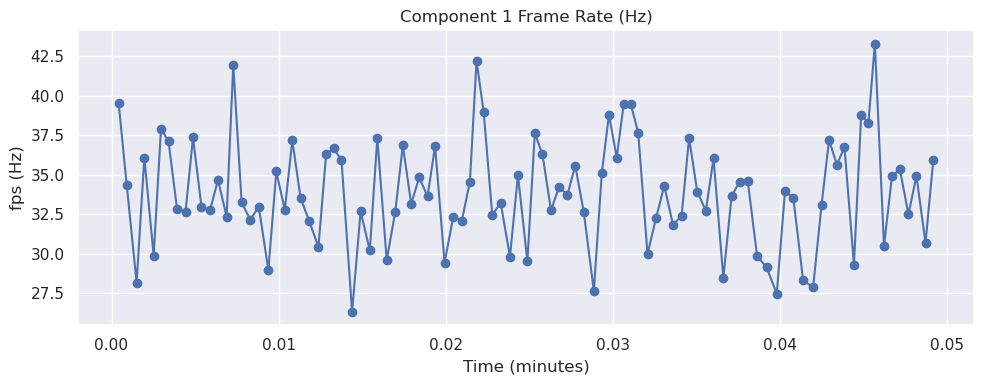

Empty DataFrame
Columns: [timestamp, rqn, frame, minutes, dt_us, drqn, dt_s, fps_inst, fps_roll]
Index: []
i = 6001

Overall average frame‐rate: nan Hz
Component 2 dt_us Statistics (Hz):
count: 51.000
mean: 57449.827
std: 8608.857
skew: -0.165
kurtosis: -0.611
Component 2 fps Statistics (Hz):
count: 51.000
mean: 17.822
std: 2.880
skew: 0.842
kurtosis: 0.313


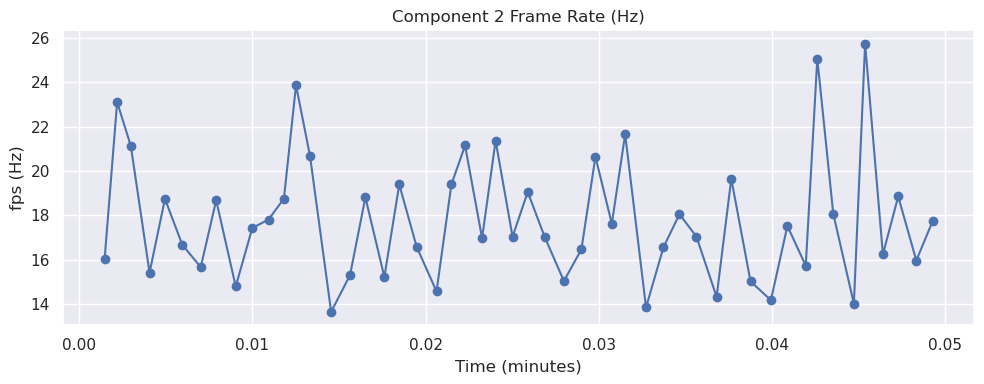

Empty DataFrame
Columns: [timestamp, rqn, frame, minutes, dt_us, drqn, dt_s, fps_inst, fps_roll]
Index: []


In [11]:
for i in range(base_port, hi_port + 1):
    index = i - base_port + 1
    y = []
    x = []
    r = []
    # Filter lines for this component
    print(f"i = {i}")
    recd_lines = [line for line in lines if f"cpu_sim {i}" in line and "recd" in line]
    # Parse bit rate values and timestamps
    n = 0
    for line in recd_lines:
        n += 1
        r.append(n)
        match = re.search(r"recd ([\d.]+)", line)
        if match:
            value = float(match.group(1))
            y.append(int(value))
            ts_match = re.match(r"([\d.]+)", line)
            x.append(float(ts_match.group(1) if ts_match else None))
        else:
            print("No match in recd line:", line)
    
    # Create a DataFrame
    recd = pd.DataFrame({
        'timestamp': x,
        'rqn': r,
        'frame': y
    })

    # Convert microseconds to zero based minutes
    recd['minutes'] = ((recd['timestamp'].astype(float)) * u_1)/60  #minutes
    
    # 1) compute differences
    recd['dt_us']  = recd['timestamp'].diff() # Δt in μs
    recd['drqn'] = recd['rqn'].diff()     # Δfrequest number count
    
    # 2) convert Δt to seconds
    recd['dt_s']     = recd['dt_us'] * u_1    # Δt in s
    
    # 3) instantaneous frame‐rate = Δframe / Δtime (Hz)
    recd['fps_inst'] = recd['drqn'] / recd['dt_s']
    recd['fps_roll'] = recd['fps_inst'].rolling(window=1, center=True).mean()
    
    # 4) overall average frame‐rate
    total_time_s     = (recd['timestamp'].iloc[-1] - recd['timestamp'].iloc[0]) / 1e6
    total_frames     = recd['drqn'].iloc[-1] - recd['drqn'].iloc[0]
    avg_fps          = total_frames / total_time_s
    print(f"\nOverall average frame‐rate: {avg_fps:.2f} Hz")    
    
    # print(recd)
    # print(f"\nOverall average frame‐rate: {avg_fps:.2f} Hz")
    
    # Compute statistics
    dt_us_stats = compute_moments(recd['dt_us'])
    
    # Display statistics
    print(f"Component {index} dt_us Statistics (Hz):")
    
    for k, v in dt_us_stats.items():
        print(f"{k}: {v:.3f}")

    # Compute statistics
    fps_stats = compute_moments(recd['fps_inst'])

    # Display statistics
    print(f"Component {index} fps Statistics (Hz):")
    
    for k, v in fps_stats.items():
        print(f"{k}: {v:.3f}")
            
    # Plot
    plt.figure(figsize=(10, 4))
    plt.plot(recd['minutes'], recd['fps_roll'], marker='o', linestyle='-')
    plt.title(f"Component {index} Frame Rate (Hz)")
    plt.xlabel('Time (minutes)')
    plt.ylabel('fps (Hz)')
    #plt.ylim(0, np.isfinite(recd['fps_roll'].mean()))
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # print(recd.head(5))

    recd.drop(recd.index, inplace=True)

    print(recd.head(5))

In [12]:
recd_lines[0:4]

['26111.0957031 [cpu_sim 6001]:  recd 1',
 '88458.3437500 [cpu_sim 6001]:  recd 3',
 '131743.4218750 [cpu_sim 6001]:  recd 4',
 '179079.6406250 [cpu_sim 6001]:  recd 6']


🔧 Component 1 (Port 6000):
Component 1 Statistics (Hz):
count: 52.000
mean: 13.094
std: 2.040
skew: 1.476
kurtosis: 3.575


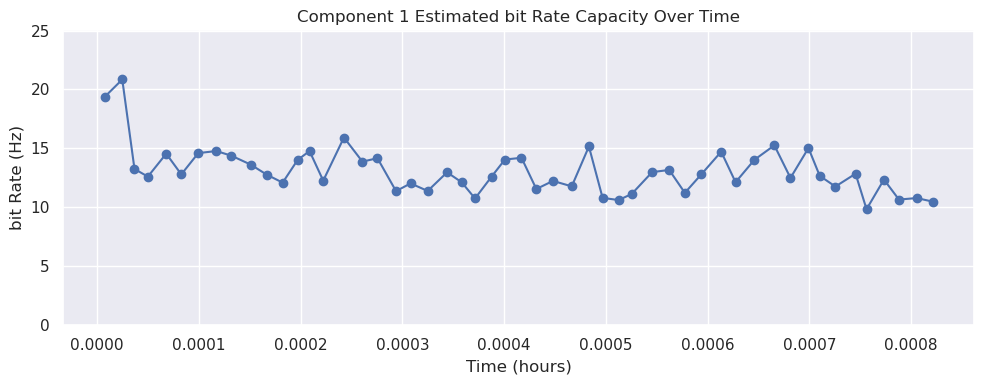


🔧 Component 2 (Port 6001):
Component 2 Statistics (Hz):
count: 49.000
mean: 13.055
std: 1.378
skew: 0.591
kurtosis: -0.192


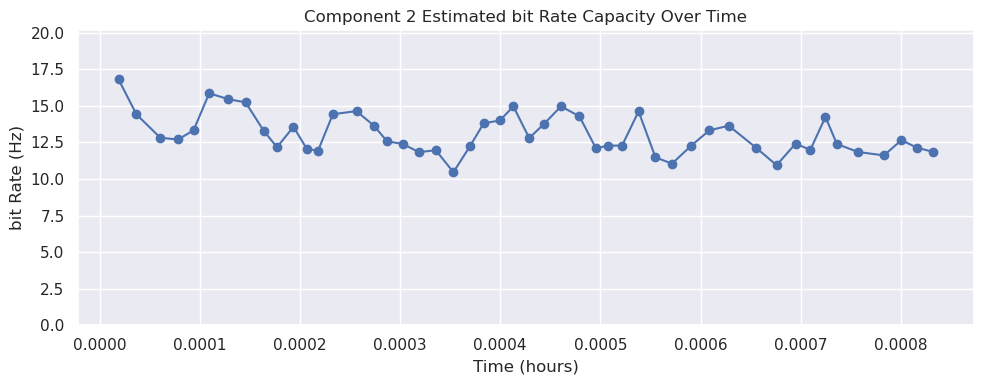

In [13]:
for i in range(base_port, hi_port + 1):
    component_id = i - base_port + 1
    print(f"\n🔧 Component {component_id} (Port {i}):")
    # Filter lines for this component
    comp_lines = [line for line in lines if f"cpu_sim {i}" in line and "Measured bit rate" in line]
    # Parse bit rate values and timestamps
    bit_rates = []
    timestamps = []
    for line in comp_lines:
        match = re.search(r"Measured bit rate ([\d.]+)", line)
        if match:
            value = float(match.group(1))
            bit_rates.append(value)
            ts_match = re.match(r"([\d.]+)", line)
            timestamps.append(ts_match.group(1) if ts_match else None)
        else:
            print("No match in bit line:", line)
    
    # Create a DataFrame
    bit_rate_df = pd.DataFrame({
        'timestamp': timestamps,
        'bit_rate': bit_rates
    })
    # Convert microseconds to hours
    bit_rate_df['hours'] = bit_rate_df['timestamp'].astype(float) / 3_600_000_000
    
    # Compute statistics
    bit_rate_stats = compute_moments(bit_rate_df['bit_rate'])
    
    # Display statistics
    print(f"Component {component_id} Statistics (Hz):")
    
    for k, v in bit_rate_stats.items():
        print(f"{k}: {v:.3f}")
    
    # Plot
    plt.figure(figsize=(10, 4))
    plt.plot(bit_rate_df['hours'], bit_rate_df['bit_rate'], marker='o', linestyle='-')
    plt.title(f"Component {component_id} Estimated bit Rate Capacity Over Time")
    plt.xlabel('Time (hours)')
    plt.ylabel('bit Rate (Hz)')
    plt.ylim(0, max(bit_rate_df['bit_rate']) * 1.2)
    plt.grid(True)
    plt.tight_layout()
    plt.show()



🔧 Component 1 (Port 6000):
Component 1 Statistics (Hz):
count: 52.000
mean: 37290.043
std: 6044.776
skew: 0.240
kurtosis: -0.434


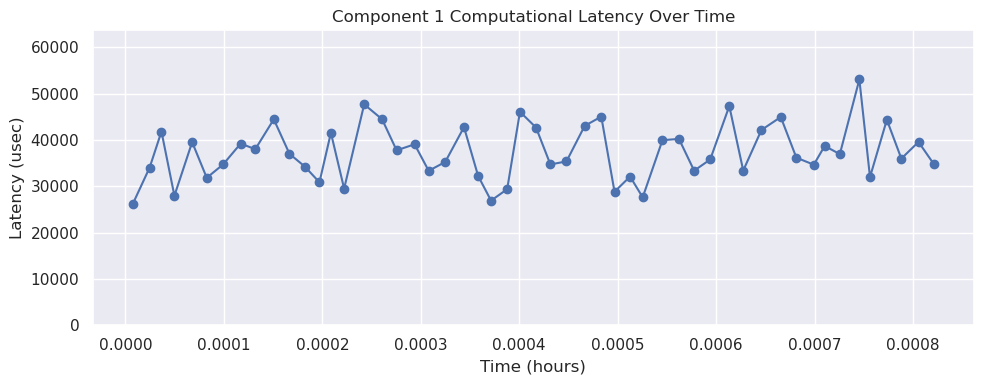


🔧 Component 2 (Port 6001):
Component 2 Statistics (Hz):
count: 49.000
mean: 41440.817
std: 5518.847
skew: 0.355
kurtosis: -0.589


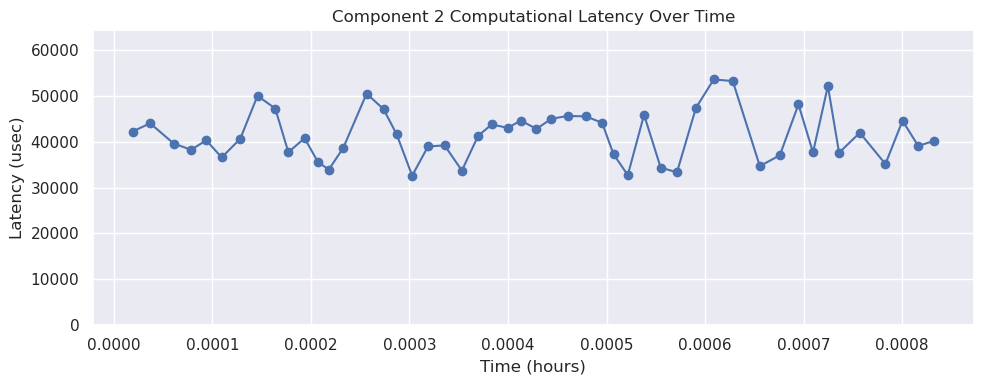

In [14]:
for i in range(base_port, hi_port + 1):
    component_id = i - base_port + 1
    print(f"\n🔧 Component {component_id} (Port {i}):")
    # Filter lines for this component
    comp_lines = [line for line in lines if f"cpu_sim {i}" in line and "Computed latencies" in line]
    # Parse bit rate values and timestamps
    y = []
    x = []
    for line in comp_lines:
        match = re.search(r"tsc_uS = ([\d.]+)", line)
        if match:
            value = float(match.group(1))
            y.append(value)
            ts_match = re.match(r"([\d.]+)", line)
            x.append(ts_match.group(1) if ts_match else None)
        else:
            print("No match in latency line:", line)
    
    # Create a DataFrame
    latency = pd.DataFrame({
        'timestamp': x,
        'latency': y
    })
    # Convert microseconds to hours
    latency['hours'] = latency['timestamp'].astype(float) / 3_600_000_000
    
    # Compute statistics
    latency_stats = compute_moments(latency['latency'])
    
    # Display statistics
    print(f"Component {component_id} Statistics (Hz):")
    
    for k, v in latency_stats.items():
        print(f"{k}: {v:.3f}")
    
    # Plot
    plt.figure(figsize=(10, 4))
    plt.plot(latency['hours'], latency['latency'], marker='o', linestyle='-')
    plt.title(f"Component {component_id} Computational Latency Over Time")
    plt.xlabel('Time (hours)')
    plt.ylabel('Latency (usec)')
    plt.ylim(0, max(latency['latency']) * 1.2)
    plt.grid(True)
    plt.tight_layout()
    plt.show()



🔧 Component 1 (Port 6000):
Component 1 Statistics (Hz):
count: 52.000
mean: 6.023
std: 0.655
skew: 0.530
kurtosis: -0.635


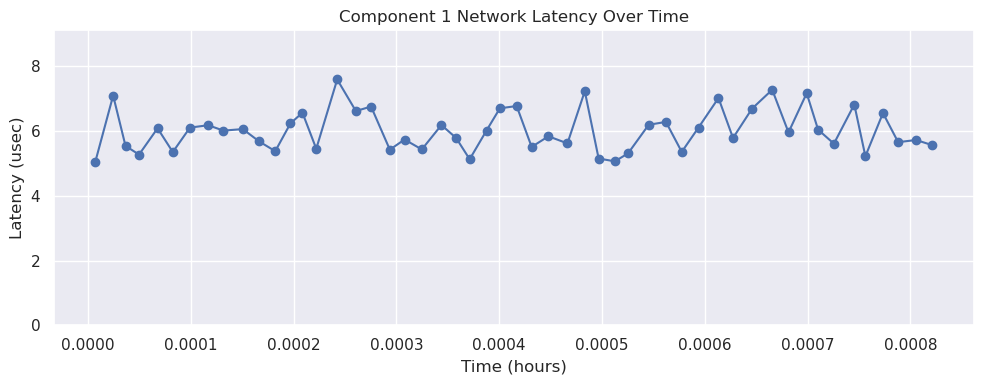


🔧 Component 2 (Port 6001):
Component 2 Statistics (Hz):
count: 49.000
mean: 6.545
std: 0.600
skew: 0.105
kurtosis: -0.840


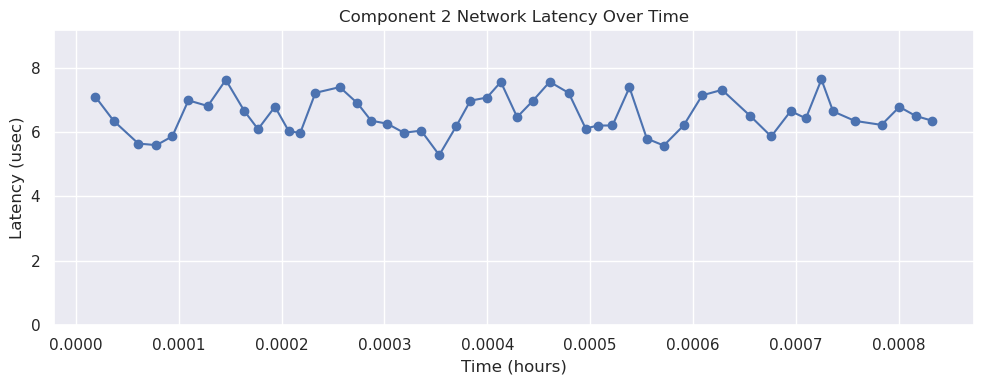

In [15]:
for i in range(base_port, hi_port + 1):
    component_id = i - base_port + 1
    print(f"\n🔧 Component {component_id} (Port {i}):")
    # Filter lines for this component
    comp_lines = [line for line in lines if f"cpu_sim {i}" in line and "Computed latencies" in line]
    # Parse bit rate values and timestamps
    y = []
    x = []
    for line in comp_lines:
        match = re.search(r"tsn_uS = ([\d.]+)", line)
        if match:
            value = float(match.group(1))
            y.append(value)
            ts_match = re.match(r"([\d.]+)", line)
            x.append(ts_match.group(1) if ts_match else None)
        else:
            print("No match in latency line:", line)
    
    # Create a DataFrame
    #print("len(lines)=",len(lines))
    #print("len(comp_lines)=",len(comp_lines))
    #print("len(x)=",len(x))
    latency = pd.DataFrame({
        'timestamp': x,
        'latency': y
    })
    # Convert microseconds to hours
    latency['hours'] = latency['timestamp'].astype(float) / 3_600_000_000
    
    # Compute statistics
    latency_stats = compute_moments(latency['latency'])
    
    # Display statistics
    print(f"Component {component_id} Statistics (Hz):")
    
    for k, v in latency_stats.items():
        print(f"{k}: {v:.3f}")
    
    # Plot
    plt.figure(figsize=(10, 4))
    plt.plot(latency['hours'], latency['latency'], marker='o', linestyle='-')
    plt.title(f"Component {component_id} Network Latency Over Time")
    plt.xlabel('Time (hours)')
    plt.ylabel('Latency (usec)')
    plt.ylim(0, max(latency['latency']) * 1.2)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


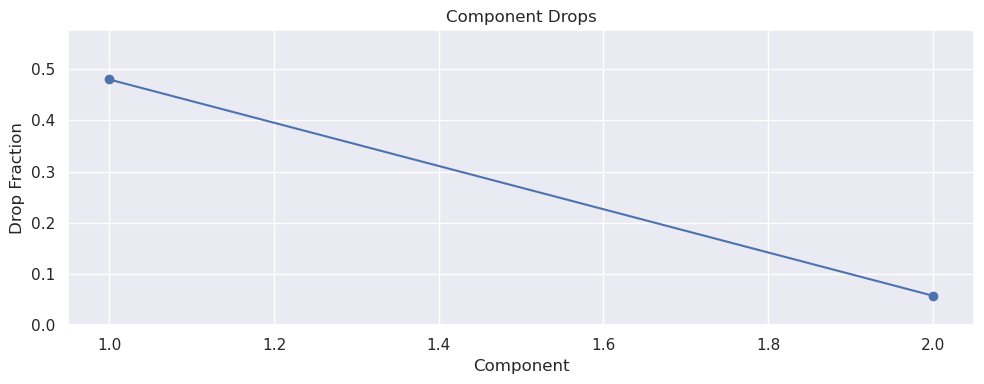

In [16]:
y = []
x = []
for i in range(base_port, hi_port + 1):
    component_id = i - base_port + 1
    #print(f"\n🔧 Component {component_id} (Port {i}):")
    # Filter lines for this component
    drop_lines = [line for line in lines if f"cpu_sim {i}" in line and "drop" in line]
    recd_lines = [line for line in lines if f"cpu_sim {i}" in line and "recd" in line]
    #print("Frames Recvd:",len(recd_lines))
    #print("Frames Dropped:",len(drop_lines))
    d = len(drop_lines)
    r = len(recd_lines)
    #print("Drop frames fraction: ", d/r)
    x.append(component_id)
    y.append(d/r)
    
# Create a DataFrame
drops = pd.DataFrame({
    'component': x,
    'fraction': y
})
    
# Plot
plt.figure(figsize=(10, 4))
plt.plot(drops['component'], drops['fraction'], marker='o', linestyle='-')
plt.title(f"Component Drops")
plt.xlabel('Component')
plt.ylabel('Drop Fraction')
plt.ylim(0, max(drops['fraction']) * 1.2)
plt.grid(True)
plt.tight_layout()
plt.show()


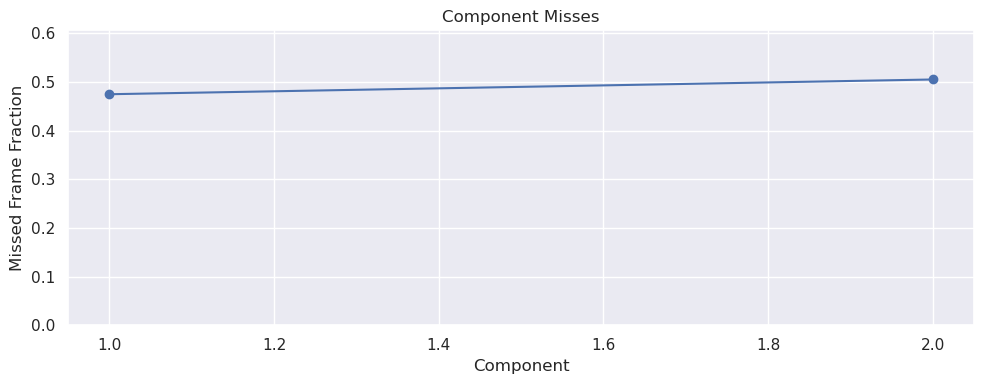

In [17]:
y = []
x = []
for i in range(base_port, hi_port + 1):
    component_id = i - base_port + 1
    #print(f"\n🔧 Component {component_id} (Port {i}):")
    # Filter lines for this component
    missed_lines = [line for line in lines if f"cpu_sim {i}" in line and "Missed frame ratio" in line]
    # Get the last match, if any
    if missed_lines:
        last_match = missed_lines[-1]
        #print("Last matching line:")
        #print(last_match)
    else:
        print(f"No matches found for '{search_string}'")

    match = re.search(r"Missed frame ratio: ([\d.]+)", last_match)
    if match:
        value = float(match.group(1))
        #print(value)
        y.append(value)
        x.append(component_id)
    else:
        print("No match in Missed line:", last_match)
        y.append(0)
        x.append(component_id)
    
# Create a DataFrame
misses = pd.DataFrame({
    'component': x,
    'fraction': y
})
    
# Plot
plt.figure(figsize=(10, 4))
plt.plot(misses['component'], misses['fraction'], marker='o', linestyle='-')
plt.title(f"Component Misses")
plt.xlabel('Component')
plt.ylabel('Missed Frame Fraction')
plt.ylim(0, max(misses['fraction']) * 1.2)
plt.grid(True)
plt.tight_layout()
plt.show()

# Define the search term and file path
#search_string = "drop"
#file_path = "log.txt"  # replace with your file path

# Read and filter lines
#with open(file_path, 'r') as f:
#    matches = [line.strip() for line in f if search_string in line]

# Get the last match, if any
#if matches:
#    last_match = matches[-1]
#    print("Last matching line:")
#    print(last_match)
#else:
#    print(f"No matches found for '{search_string}'")


In [18]:
#drops

In [19]:
#drops['fraction'].sum()

In [20]:
#misses

In [21]:
#misses['fraction']-drops['fraction']


🔧 Component 1 (Port 6000):


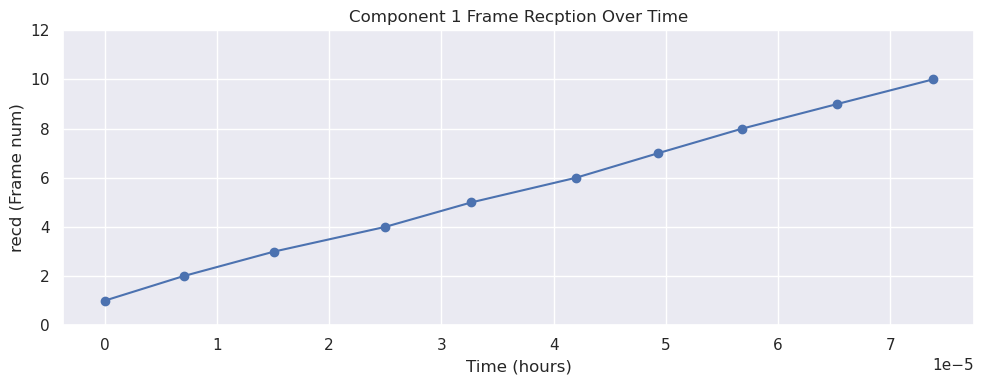


🔧 Component 2 (Port 6001):


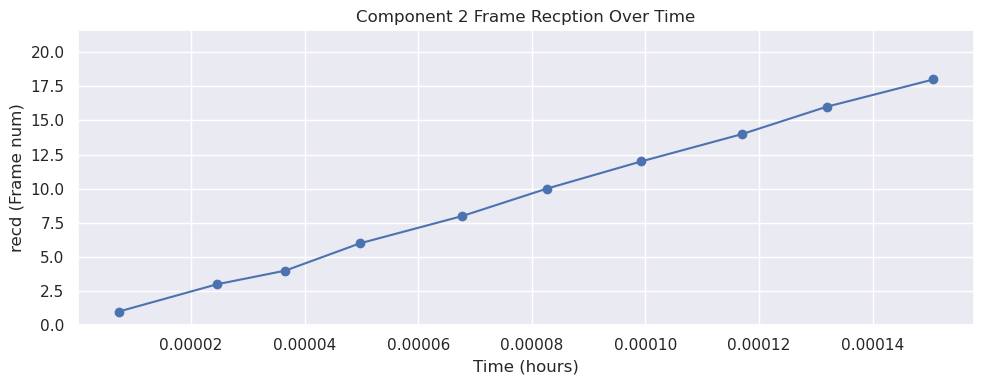

In [22]:
for i in range(base_port, hi_port + 1):
    component_id = i - base_port + 1
    print(f"\n🔧 Component {component_id} (Port {i}):")
    # Filter lines for this component
    recd_lines = [line for line in lines if f"cpu_sim {i}" in line and "recd" in line]
    # Parse bit rate values and timestamps
    y = []
    x = []
    for line in recd_lines:
        match = re.search(r"recd ([\d.]+)", line)
        if match:
            value = float(match.group(1))
            y.append(value)
            ts_match = re.match(r"([\d.]+)", line)
            x.append(ts_match.group(1) if ts_match else None)
        else:
            print("No match in recd line:", line)
    
    # Create a DataFrame
    #print("len(lines)=",len(lines))
    #print("len(comp_lines)=",len(comp_lines))
    #print("len(x)=",len(x))
    recd = pd.DataFrame({
        'timestamp': x,
        'frame': y
    })
    # Convert microseconds to hours
    recd['hours'] = recd['timestamp'].astype(float) / 3_600_000_000
    
    # Compute statistics
    #recd_stats = compute_moments(recd['frame'])
    
    # Display statistics
    #print(f"Component {component_id} Statistics (Hz):")
    
    #for k, v in recd_stats.items():
        #print(f"{k}: {v:.3f}")
    
    # Plot
    plt.figure(figsize=(10, 4))
    plt.plot(recd['hours'].head(10), recd['frame'].head(10), marker='o', linestyle='-')
    plt.title(f"Component {component_id} Frame Recption Over Time")
    plt.xlabel('Time (hours)')
    plt.ylabel('recd (Frame num)')
    plt.ylim(0, max(recd['frame'].head(10)) * 1.2)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


/scratch/slurm/51221239/.cache/tmp/ipykernel_764435/1114673558.py:43: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


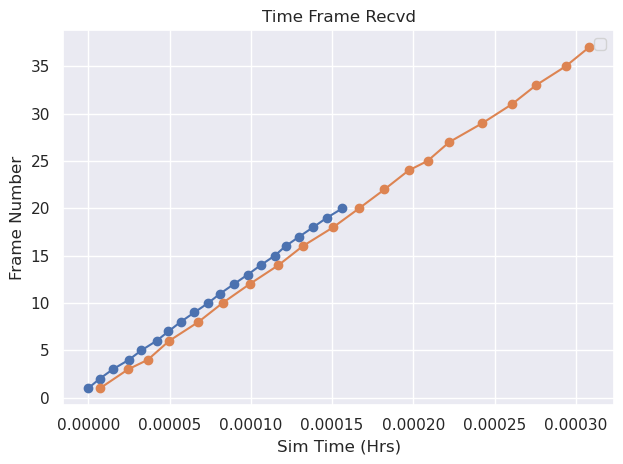

In [23]:
for i in range(base_port, hi_port + 1):
    component_id = i - base_port + 1
    #print(f"\n🔧 Component {component_id} (Port {i}):")
    # Filter lines for this component
    recd_lines = [line for line in lines if f"cpu_sim {i}" in line and "recd" in line]
    # Parse bit rate values and timestamps
    y = []
    x = []
    for line in recd_lines:
        match = re.search(r"recd ([\d.]+)", line)
        if match:
            value = float(match.group(1))
            y.append(value)
            ts_match = re.match(r"([\d.]+)", line)
            x.append(ts_match.group(1) if ts_match else None)
        else:
            print("No match in recd line:", line)
    
    # Create a DataFrame
    recd = pd.DataFrame({
        'timestamp': x,
        'frame': y
    })
    # Convert microseconds to hours
    recd['hours'] = recd['timestamp'].astype(float) / 3_600_000_000
    
    # Compute statistics
    #recd_stats = compute_moments(recd['frame'])
    
    # Display statistics
    #print(f"Component {component_id} Statistics (Hz):")
    
    #for k, v in recd_stats.items():
        #print(f"{k}: {v:.3f}")
    
    # Plot
    plt.plot(recd['hours'].head(20), recd['frame'].head(20), marker='o', linestyle='-')
    
# Add labels and legend
plt.xlabel('Sim Time (Hrs)')
plt.ylabel('Frame Number')
plt.title('Time Frame Recvd')
plt.legend()

# Show grid and plot
plt.grid(True)
plt.tight_layout()
plt.show()


Component 1 Statistics (Hz):
count: 99.000
mean: 29789.040
std: 3043.136
skew: 0.361
kurtosis: -0.182


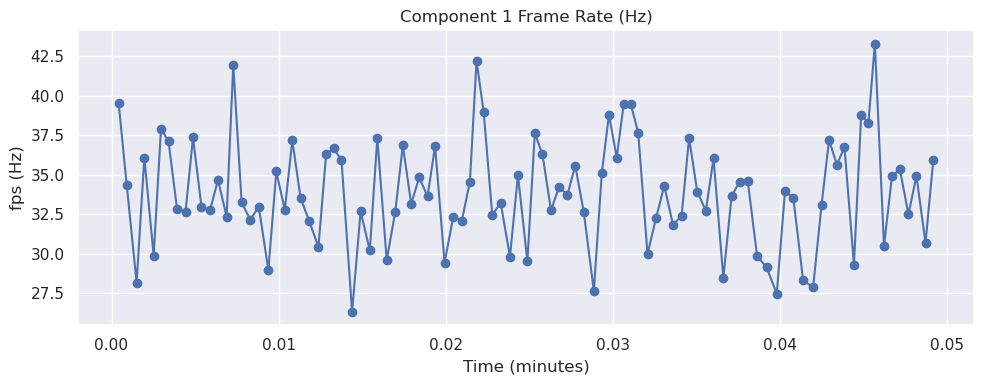

Component 2 Statistics (Hz):
count: 51.000
mean: 57449.827
std: 8608.857
skew: -0.165
kurtosis: -0.611


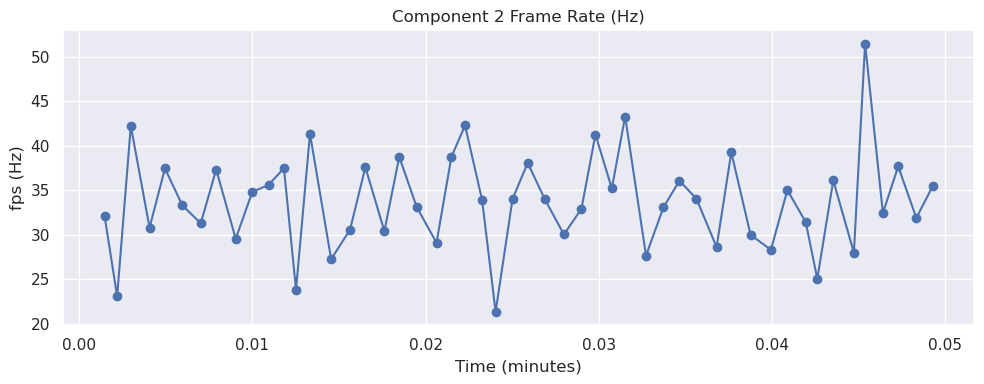

In [24]:
for i in range(base_port, hi_port + 1):
    index = i - base_port + 1
    y = []
    x = []
    # Filter lines for this component
    recd_lines = [line for line in lines if f"cpu_sim {i}" in line and "recd" in line]
    # Parse bit rate values and timestamps
    for line in recd_lines:
        match = re.search(r"recd ([\d.]+)", line)
        if match:
            value = float(match.group(1))
            y.append(int(value))
            ts_match = re.match(r"([\d.]+)", line)
            x.append(float(ts_match.group(1) if ts_match else None))
        else:
            print("No match in recd line:", line)
    
    # Create a DataFrame
    recd = pd.DataFrame({
        'timestamp': x,
        'frame': y
    })

    # Convert microseconds to zero based minutes
    recd['minutes'] = ((recd['timestamp'].astype(float)) * u_1)/60  #minutes
    
    # 1) compute differences
    recd['dt_us']  = recd['timestamp'].diff() # Δt in μs
    recd['dframe'] = recd['frame'].diff()     # Δframe count
    
    # 2) convert Δt to seconds
    recd['dt_s']     = recd['dt_us'] * u_1    # Δt in s
    
    # 3) instantaneous frame‐rate = Δframe / Δtime (Hz)
    recd['fps_inst'] = recd['dframe'] / recd['dt_s']
    recd['fps_roll'] = recd['fps_inst'].rolling(window=1, center=True).mean()
    
    # 4) overall average frame‐rate
    total_time_s     = (recd['timestamp'].iloc[-1] - recd['timestamp'].iloc[0]) / 1e6
    total_frames     = recd['frame'].iloc[-1] - recd['frame'].iloc[0]
    avg_fps          = total_frames / total_time_s
    
    # print(recd)
    # print(f"\nOverall average frame‐rate: {avg_fps:.2f} Hz")
    
    # Compute statistics
    dt_us_stats = compute_moments(recd['dt_us'])
    
    # Display statistics
    print(f"Component {index} Statistics (Hz):")
    
    for k, v in dt_us_stats.items():
        print(f"{k}: {v:.3f}")
            
    # Plot
    plt.figure(figsize=(10, 4))
    plt.plot(recd['minutes'], recd['fps_roll'], marker='o', linestyle='-')
    plt.title(f"Component {index} Frame Rate (Hz)")
    plt.xlabel('Time (minutes)')
    plt.ylabel('fps (Hz)')
    #plt.ylim(0, np.isfinite(recd['fps_roll'].mean()))
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [25]:
recd.head(5)

,timestamp,frame,minutes,dt_us,dframe,dt_s,fps_inst,fps_roll
0,26111.095703,1,0.000435,NaN,NaN,NaN,NaN,NaN
1,88458.343750,3,0.001474,62347.248047,2.0,0.062347,32.078401,32.078401
2,131743.421875,4,0.002196,43285.078125,1.0,0.043285,23.102650,23.102650
3,179079.640625,6,0.002985,47336.218750,2.0,0.047336,42.250946,42.250946
4,243982.593750,8,0.004066,64902.953125,2.0,0.064903,30.815239,30.815239


/scratch/slurm/51221239/.cache/tmp/ipykernel_764435/3278626246.py:46: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


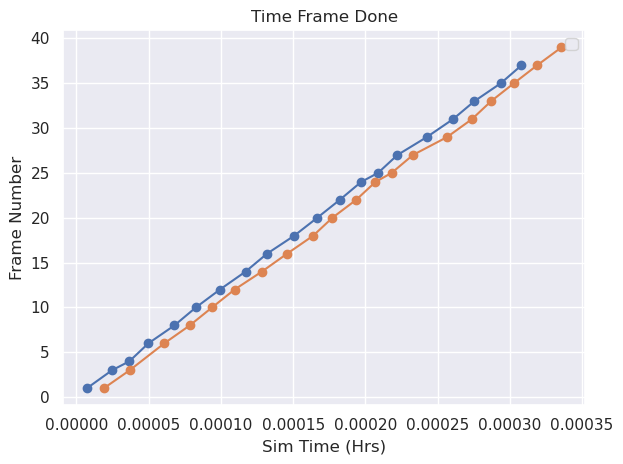

In [26]:
for i in range(base_port, hi_port + 1):
    component_id = i - base_port + 1
    #print(f"\n🔧 Component {component_id} (Port {i}):")
    # Filter lines for this component
    done_lines = [line for line in lines if f"cpu_sim {i}" in line and "done" in line]
    # Parse bit rate values and timestamps
    y = []
    x = []
    for line in done_lines:
        match = re.search(r"done (\([\d.]+\))", line)
        if match:
            #print(match.group(1))
            #print(match.group(1).strip("()"))
            value = float(match.group(1).strip("()"))
#base_port = 7000
#hi_port   = 7019
for i in range(base_port, hi_port + 1):
    component_id = i - base_port + 1
    print(f"\n🔧 Component {component_id} (Port {i}):")
    # Filter lines for this component
    comp_lines = [line for line in lines if f"cpu_sim {i}" in line and "Measured frame rate" in line]
    # Parse frame rate values and timestamps
    frame_rates = []
    timestamps = []
    for line in comp_lines:
        match = re.search(r"Measured frame rate ([\d.]+)", line)
        if match:
            value = float(match.group(1))
            frame_rates.append(value)
            ts_match = re.match(r"([\d.]+)", line)
            timestamps.append(ts_match.group(1) if ts_match else None)
        else:
            print("No match in frame size line:", line)
    
    # Create a DataFrame
    frame_rate_df = pd.DataFrame({
        'timestamp': timestamps,
        'frame_rate': frame_rates
    })
    # Convert microseconds to hours
    frame_rate_df['hours'] = frame_rate_df['timestamp'].astype(float) / 3_600_000_000
    
    # Compute statistics
    frame_rate_stats = compute_moments(frame_rate_df['frame_rate'])
    
    # Display statistics
    print(f"Component {component_id} Statistics (Hz):")
    
    for k, v in frame_rate_stats.items():
        print(f"{k}: {v:.3f}")
    
    # Plot
    plt.figure(figsize=(10, 4))
    plt.plot(frame_rate_df['hours'], frame_rate_df['frame_rate'], marker='o', linestyle='-')
    plt.title(f"Component {component_id} Estimated Frame Rate Capacity Over Time")
    plt.xlabel('Time (hours)')
    plt.ylabel('Frame Rate (Hz)')
    plt.ylim(0, max(frame_rate_df['frame_rate']) * 1.2)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
            #print(value)
            y.append(value)
            ts_match = re.match(r"([\d.]+)", line)
            x.append(ts_match.group(1) if ts_match else None)
        else:
            print("No match in done line:", line)
    
    # Create a DataFrame
    done = pd.DataFrame({
        'timestamp': x,
        'frame': y
    })
    # Convert microseconds to hours
    done['hours'] = done['timestamp'].astype(float) / 3_600_000_000
    
    # Compute statistics
    #recd_stats = compute_moments(recd['frame'])
    
    # Display statistics
    #print(f"Component {component_id} Statistics (Hz):")
    
    #for k, v in recd_stats.items():
        #print(f"{k}: {v:.3f}")
    
    # Plot
    plt.plot(done['hours'].head(20), done['frame'].head(20), marker='o', linestyle='-')
    
# Add labels and legend
plt.xlabel('Sim Time (Hrs)')
plt.ylabel('Frame Number')
plt.title('Time Frame Done')
plt.legend()

# Show grid and plot
plt.grid(True)
plt.tight_layout()
plt.show()


In [27]:
#import matplotlib.pyplot as plt

# Example data
#x = [0, 1, 2, 3, 4]
#y1 = [0, 1, 4, 9, 16]
#y2 = [0, 1, 2, 3, 4]
#y3 = [16, 9, 4, 1, 0]

# Plot each series with a label
#plt.plot(x, y1, label='y = x^2', color='blue')
#plt.plot(x, y2, label='y = x', color='green')
#plt.plot(x, y3, label='y = -x^2', color='red')

# Add labels and legend
#plt.xlabel('X-axis')
#plt.ylabel('Y-axis')
#plt.title('Multiple Series on One Plot')
#plt.legend()

# Show grid and plot
#plt.grid(True)
#plt.tight_layout()
#plt.show()


In [28]:
#done.head(20)